# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [292]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [293]:
'''
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
mapping2 = {
    'Internet': 1,
    'Mobile': 0
}

mapping3 = {
    'RoundTrip': 0,
    'CircleTrip': 1,
    'OneWay': 2
}

df["flight_day"] = df["flight_day"].map(mapping)
df['sales_channel'] = df['sales_channel'].map(mapping2)
df['trip_type'] = df['trip_type'].map(mapping3)
'''

'\nmapping = {\n    "Mon": 1,\n    "Tue": 2,\n    "Wed": 3,\n    "Thu": 4,\n    "Fri": 5,\n    "Sat": 6,\n    "Sun": 7,\n}\nmapping2 = {\n    \'Internet\': 1,\n    \'Mobile\': 0\n}\n\nmapping3 = {\n    \'RoundTrip\': 0,\n    \'CircleTrip\': 1,\n    \'OneWay\': 2\n}\n\ndf["flight_day"] = df["flight_day"].map(mapping)\ndf[\'sales_channel\'] = df[\'sales_channel\'].map(mapping2)\ndf[\'trip_type\'] = df[\'trip_type\'].map(mapping3)\n'

In [294]:
import pandas as pd

df['booking_origin'].unique()

# Function to split the route column
def split_route(route):
    if pd.notna(route) and len(route) >= 6:
        return route[:3], route[3:]
    else:
        return pd.NA, pd.NA

df[['origin', 'destination']] = df['route'].apply(split_route).apply(pd.Series)
df.reset_index()
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


In [295]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

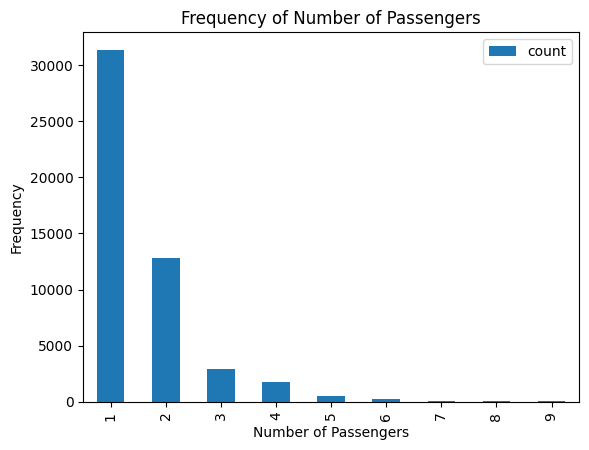

   num_passengers  count
0               1  31352
1               2  12804
2               3   2941
3               4   1784
4               5    561
5               6    289
6               7    114
7               8     89
8               9     66


In [296]:
import matplotlib.pyplot as plt
import numpy as np


df1 = pd.DataFrame()
df1 = df['num_passengers'].value_counts().reset_index()
df1.plot.bar(x = 'num_passengers', y = 'count')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Passengers')
plt.show()
print(df1)

  sales_channel  count
0      Internet  44382
1        Mobile   5618


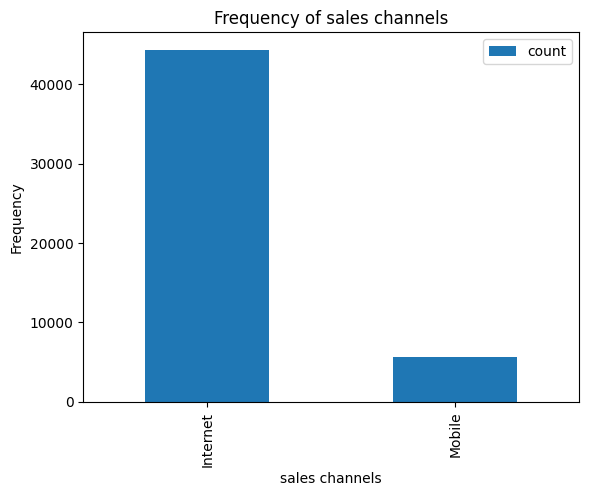

In [297]:
df1 = df['sales_channel'].value_counts().reset_index()
df1.plot.bar(x = 'sales_channel', y = 'count')
plt.xlabel('sales channels')
plt.ylabel('Frequency')
plt.title('Frequency of sales channels')
plt.show
print(df1)


    trip_type  count
0   RoundTrip  49497
1      OneWay    387
2  CircleTrip    116


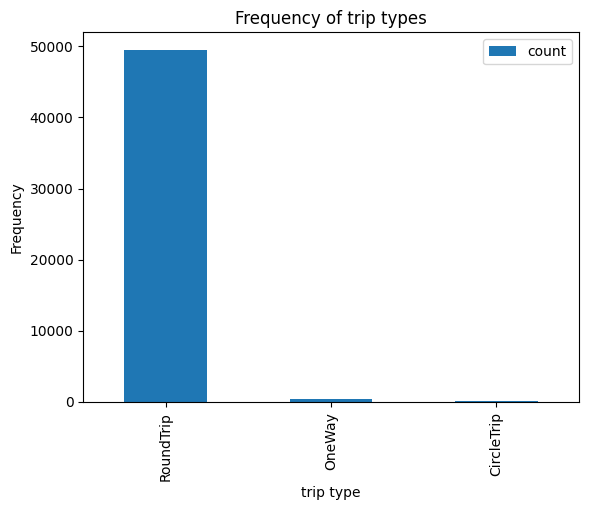

In [298]:
df1 = df['trip_type'].value_counts().reset_index()
df1.plot.bar(x='trip_type', y='count')
plt.xlabel('trip type')
plt.ylabel('Frequency')
plt.title('Frequency of trip types')
plt.show
print(df1)

    purchase_lead  count
0               1    685
1               2    670
2               6    653
3               7    638
4               5    615
5              13    606
6               4    606
7               8    597
8               9    593
9              20    589
10             12    587
11              3    576
12             10    571
13             18    559
14             21    556
15             19    552
16             15    549
17             11    547
18             16    544
19             22    543
20             14    541
21             17    521
22             23    514
23             27    507
24             29    503
25             25    499
26             26    490
27             24    487
28             28    453
29             32    432
30             33    426
31             30    418
32             31    415
33             37    413
34             42    412
35             38    406
36             40    404
37             36    393
38             34    386


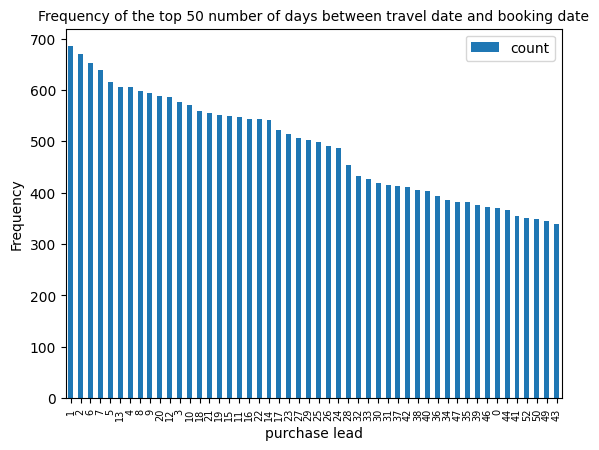

In [299]:
df1 = df['purchase_lead'].value_counts().nlargest(50).reset_index()
df1.plot.bar(x='purchase_lead', y='count', width=.5)
plt.xlabel('purchase lead')
plt.ylabel('Frequency')
plt.title('Frequency of the top 50 number of days between travel date and booking date', fontsize=10)
plt.xticks(fontsize=7)
plt.show
print(df1)

    length_of_stay  count
0                6   7757
1                5   7286
2                4   5655
3                3   2839
4               17   1849
5               21   1392
6               18   1356
7               22   1285
8               20   1285
9               19   1253
10              29   1040
11              23    941
12               2    866
13              28    851
14              30    793
15              27    768
16              24    765
17              25    650
18              31    634
19              26    600
20              32    456
21              33    421
22              34    394
23              35    383
24              36    373
25              37    284
26               1    261
27              38    249
28              41    249
29              42    230
30              40    217
31              39    213
32              43    205
33              89    197
34              44    177
35              88    173
36              90    168
37          

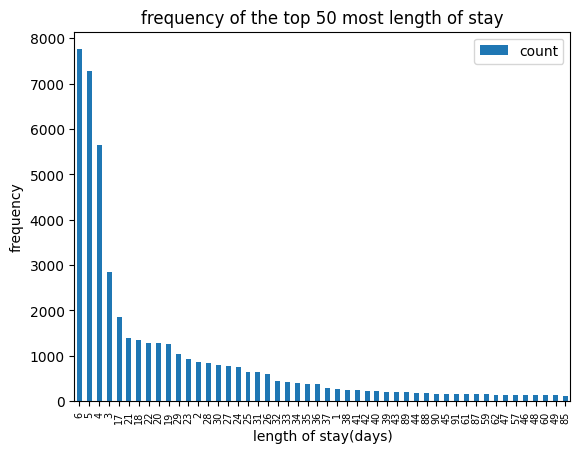

In [300]:
df1 = df['length_of_stay'].value_counts().nlargest(50).reset_index()
df1.plot.bar(x='length_of_stay',y='count')
plt.xlabel('length of stay(days)')
plt.ylabel('frequency')
plt.title('frequency of the top 50 most length of stay')
plt.xticks(fontsize=7)
print(df1)

    flight_hour  count
0             8   3165
1            12   3163
2             9   3132
3             7   3126
4            11   3110
5            13   3101
6            10   3085
7             6   3050
8             5   2851
9             4   2843
10           14   2833
11            3   2655
12            2   2642
13           15   2234
14            1   2089
15           16   1557
16            0   1539
17           23    986
18           17    861
19           22    579
20           18    439
21           21    389
22           19    295
23           20    276


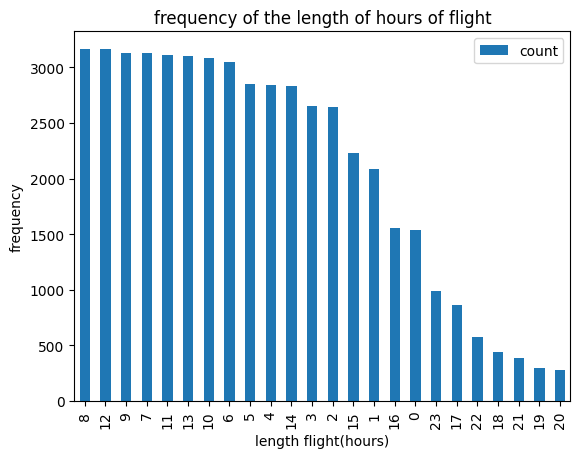

In [301]:
df1 = df['flight_hour'].value_counts().reset_index()
df1.plot.bar(x='flight_hour',y='count')
plt.xlabel('length flight(hours)')
plt.ylabel('frequency')
plt.title('frequency of the length of hours of flight')
print(df1)

  flight_day  count
0        Mon   8102
1        Wed   7674
2        Tue   7673
3        Thu   7424
4        Fri   6761
5        Sun   6554
6        Sat   5812


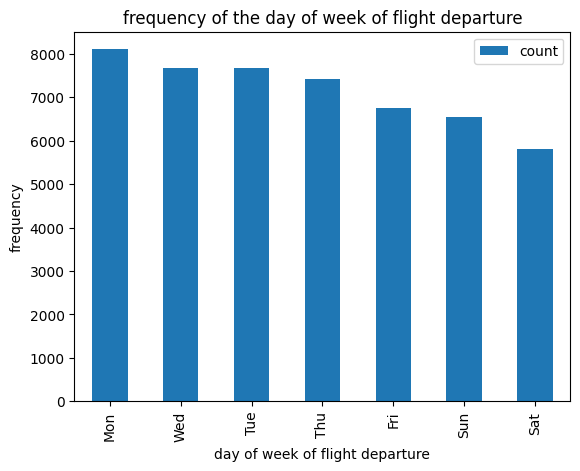

In [302]:
df1 = df['flight_day'].value_counts().reset_index()
df1.plot.bar(x='flight_day',y='count')
plt.xlabel('day of week of flight departure')
plt.ylabel('frequency')
plt.title('frequency of the day of week of flight departure')
print(df1)


     route  count
0   AKLKUL   2680
1   PENTPE    924
2   MELSGN    842
3   ICNSIN    801
4   DMKKIX    744
5   ICNSYD    695
6   DMKPER    679
7   DPSICN    666
8   DMKOOL    655
9   MELPEN    649
10  MELTPE    644
11  SGNSYD    614
12  DMKSYD    532
13  COKSYD    511
14  COKMEL    474
15  CMBMEL    465
16  HNDPEN    442
17  PENPER    437
18  DPSPVG    417
19  CGKICN    414
20  JHBKTM    409
21  CGKHND    389
22  HKTICN    375
23  PENSYD    369
24  PERSGN    361
25  DMKMEL    351
26  CTSDMK    350
27  HKTSYD    346
28  DPSKIX    342
29  COKPER    338
30  CGKKIX    338
31  ICNPER    335
32  HKTPER    327
33  CMBSYD    317
34  KTMPEN    314
35  DPSHND    313
36  PERTPE    312
37  ICNPEN    299
38  ICNMEL    298
39  OOLSGN    296
40  HNDSIN    288
41  KTMMFM    275
42  HKTOOL    273
43  DMKICN    272
44  DELMEL    268
45  HYDSYD    265
46  KIXSIN    261
47  HNDPER    261
48  KCHPER    254
49  DPSPEK    254


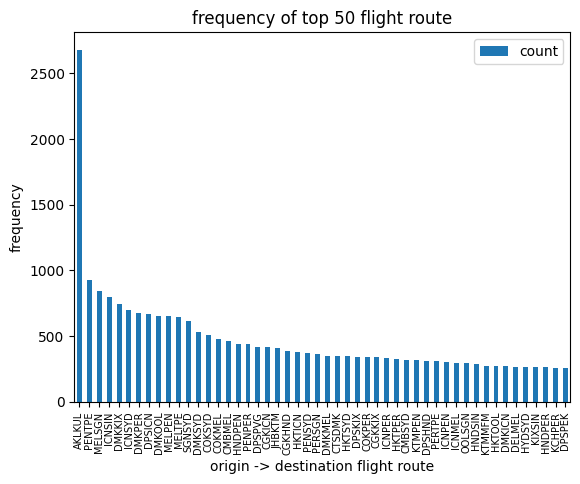

In [303]:
df1 = df['route'].value_counts().nlargest(50).reset_index()
df1.plot.bar(x='route',y='count')
plt.xlabel('origin -> destination flight route')
plt.ylabel('frequency')
plt.title('frequency of top 50 flight route')
plt.xticks(fontsize=7)
print(df1)

   origin  count
0     DMK   3747
1     ICN   3732
2     MEL   3468
3     DPS   2902
4     AKL   2849
5     HKT   2387
6     CGK   2339
7     PEN   2111
8     HND   1774
9     COK   1673
10    PER   1453
11    KIX   1296
12    CMB   1289
13    BKI   1286
14    DEL   1205
15    OOL   1134
16    KCH   1015
17    JHB    877
18    KTM    832
19    CTS    733
20    PEK    661
21    SGN    615
22    HYD    601
23    MAA    588
24    KNO    548
25    CNX    532
26    HKG    525
27    CTU    515
28    LGK    407
29    IKA    404
30    SYD    364
31    HGH    364
32    DAC    359
33    KBV    349
34    PUS    347
35    CCU    294
36    PVG    280
37    BDO    270
38    BLR    267
39    MNL    253
40    BWN    204
41    CEB    202
42    HAN    191
43    MYY    190
44    JOG    183
45    CAN    172
46    DAD    156
47    PNH    148
48    SBW    143
49    KBR    143


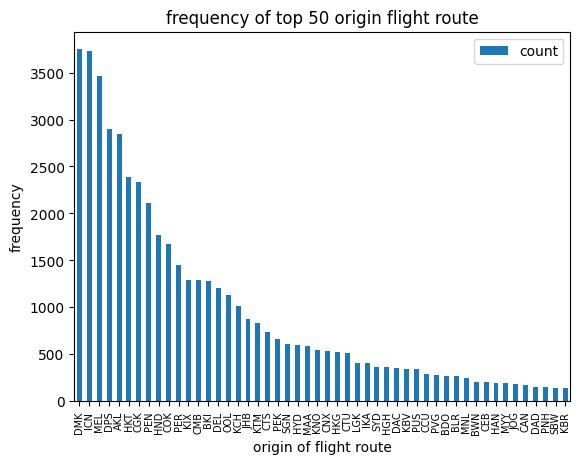

In [304]:

df1 = df['origin'].value_counts().nlargest(50).reset_index()
df1.plot.bar(x='origin',y='count')
plt.xlabel('origin of flight route')
plt.ylabel('frequency')
plt.title('frequency of top 50 origin flight route')
plt.xticks(fontsize=7)
print(df1)

   destination  count
0          SYD   6616
1          PER   4992
2          MEL   4444
3          TPE   4044
4          OOL   2796
5          KUL   2688
6          PEN   2483
7          KIX   2240
8          ICN   2213
9          SIN   2157
10         SGN   1696
11         PVG   1575
12         PEK   1338
13         HND   1212
14         PUS   1038
15         KTM    588
16         TRZ    573
17         PNH    565
18         LGK    418
19         SBW    382
20         SUB    370
21         DMK    370
22         MNL    338
23         REP    317
24         DPS    314
25         MFM    306
26         XIY    293
27         RGN    292
28         TWU    271
29         KCH    237
30         HGH    237
31         KNO    228
32         MLE    227
33         JHB    214
34         MRU    187
35         IKA    142
36         HKT    136
37         TGG    132
38         WUH    129
39         DEL    125
40         KBV    123
41         VTZ    110
42         MYY    109
43         CTS     92
44        

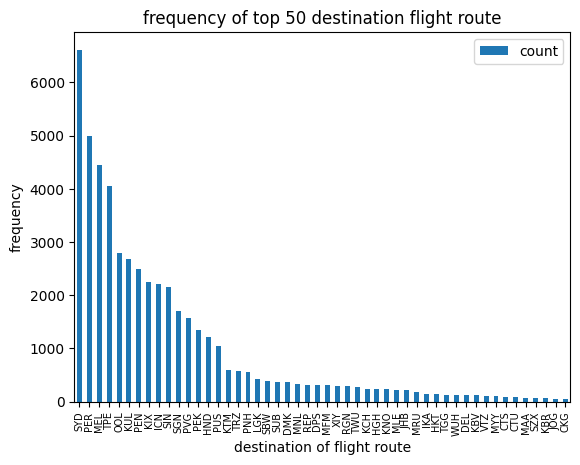

In [305]:
df1 = df['destination'].value_counts().nlargest(50).reset_index()
df1.plot.bar(x='destination',y='count')
plt.xlabel('destination of flight route')
plt.ylabel('frequency')
plt.title('frequency of top 50 destination flight route')
plt.xticks(fontsize=7)
print(df1)


          booking_origin  count
0              Australia  17872
1               Malaysia   7174
2            South Korea   4559
3                  Japan   3885
4                  China   3387
5              Indonesia   2369
6                 Taiwan   2077
7               Thailand   2030
8                  India   1270
9            New Zealand   1074
10             Singapore   1044
11         United States    456
12               Vietnam    388
13                 Macau    304
14             Hong Kong    295
15           Philippines    266
16        United Kingdom    173
17                Brunei    167
18              Cambodia    132
19             (not set)     84
20             Sri Lanka     73
21                France     59
22                 Italy     58
23                Canada     57
24               Germany     57
25       Myanmar (Burma)     51
26           Netherlands     46
27             Mauritius     44
28  United Arab Emirates     42
29                 Nepal     40
30      

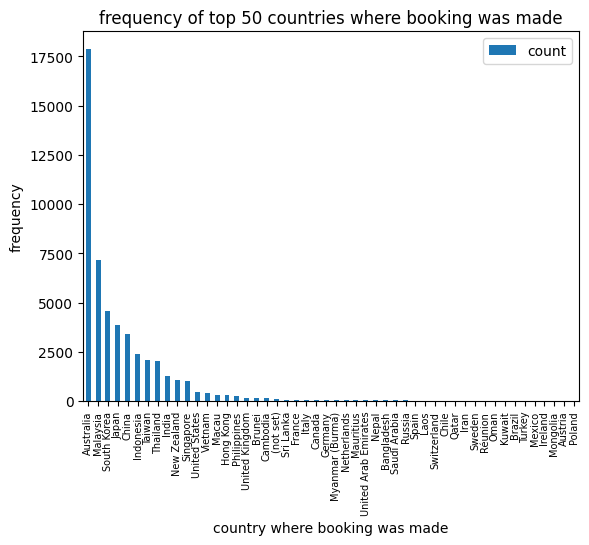

In [306]:
df1 = df['booking_origin'].value_counts().nlargest(50).reset_index()
df1.plot.bar(x='booking_origin',y='count')
plt.xlabel('country where booking was made')
plt.ylabel('frequency')
plt.title('frequency of top 50 countries where booking was made')
plt.xticks(fontsize=7)
print(df1)

   wants_extra_baggage  count
0                    1  33439
1                    0  16561


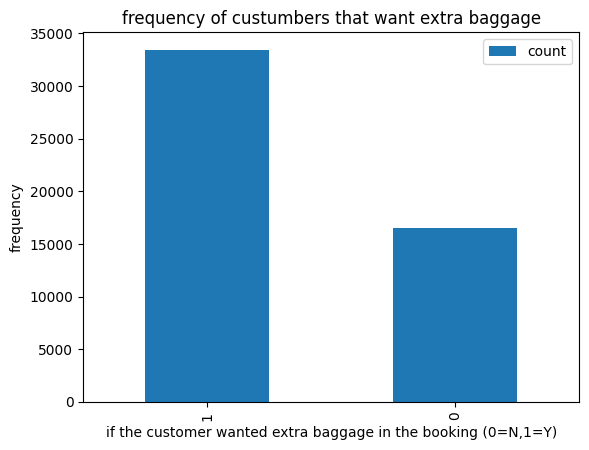

In [307]:
df1 = df['wants_extra_baggage'].value_counts().reset_index()
df1.plot.bar(x='wants_extra_baggage',y='count')
plt.xlabel('if the customer wanted extra baggage in the booking (0=N,1=Y)')
plt.ylabel('frequency')
plt.title('frequency of custumbers that want extra baggage')
print(df1)


   wants_preferred_seat  count
0                     0  35152
1                     1  14848


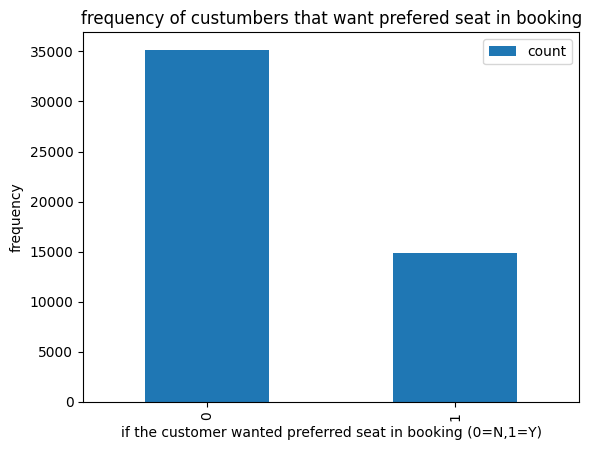

In [308]:
df1 = df['wants_preferred_seat'].value_counts().reset_index()
df1.plot.bar(x='wants_preferred_seat',y='count')
plt.xlabel('if the customer wanted preferred seat in booking (0=N,1=Y)')
plt.ylabel('frequency')
plt.title('frequency of custumbers that want prefered seat in booking')
print(df1)



   wants_in_flight_meals  count
0                      0  28643
1                      1  21357


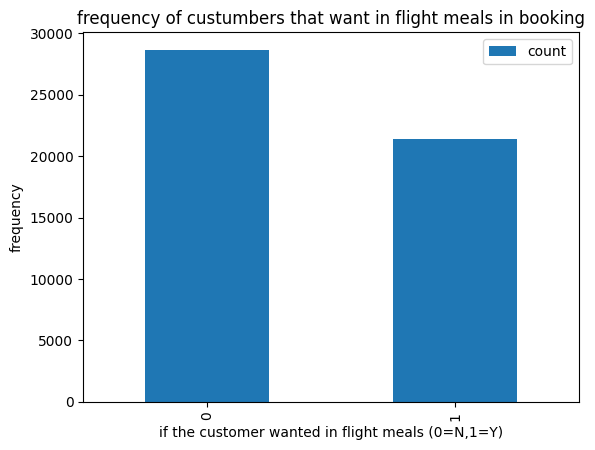

In [309]:
df1 = df['wants_in_flight_meals'].value_counts().reset_index()
df1.plot.bar(x='wants_in_flight_meals',y='count')
plt.xlabel('if the customer wanted in flight meals (0=N,1=Y)')
plt.ylabel('frequency')
plt.title('frequency of custumbers that want in flight meals in booking')
print(df1)


    flight_duration  count
0              8.83  14520
1              8.58   6965
2              5.62   5524
3              6.62   4721
4              7.00   3374
5              7.57   2835
6              4.67   2743
7              6.42   1737
8              5.33   1554
9              4.75   1255
10             6.33   1190
11             8.67    807
12             5.52    667
13             5.07    512
14             4.72    502
15             8.15    311
16             5.00    241
17             7.42    224
18             4.83    156
19             5.13    125
20             9.50     37


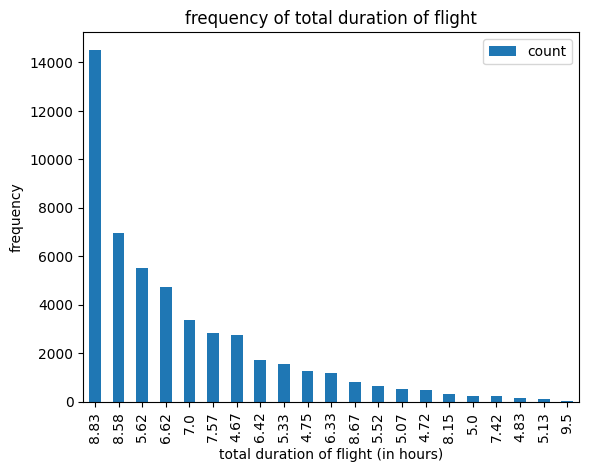

In [310]:
df1 = df['flight_duration'].value_counts().reset_index()
df1.plot.bar(x='flight_duration',y='count')
plt.xlabel('total duration of flight (in hours)')
plt.ylabel('frequency')
plt.title('frequency of total duration of flight')
print(df1)



   booking_complete  count
0                 0  42522
1                 1   7478


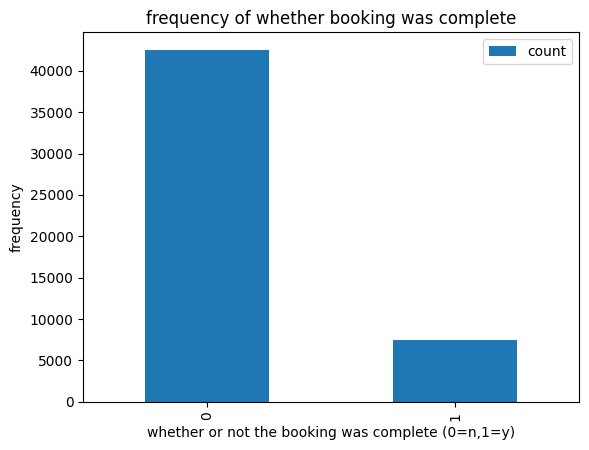

In [311]:
df1 = df['booking_complete'].value_counts().reset_index()
df1.plot.bar(x='booking_complete',y='count')
plt.xlabel('whether or not the booking was complete (0=n,1=y)')
plt.ylabel('frequency')
plt.title('frequency of whether booking was complete')
print(df1)


Machine Learning part
 
Data cleaning

In [312]:
df2 = df
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
mapping2 = {
    'Internet': 1,
    'Mobile': 0
}

mapping3 = {
    'RoundTrip': 0,
    'CircleTrip': 1,
    'OneWay': 2
}

df2["flight_day"] = df2["flight_day"].map(mapping)
df2['sales_channel'] = df2['sales_channel'].map(mapping2)
df2['trip_type'] = df2['trip_type'].map(mapping3)
df2

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,1,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,1,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,1,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,1,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,0,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49996,1,1,0,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49997,1,1,0,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
49998,1,1,0,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


In [313]:
df2_updated = df2.drop(['origin', 'destination', 'route', 'booking_origin'], axis=1)
df2_updated

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,6,1,0,0,5.52,0
1,1,1,0,112,20,3,6,0,0,0,5.52,0
2,2,1,0,243,22,17,3,1,1,0,5.52,0
3,1,1,0,96,31,4,6,0,0,1,5.52,0
4,2,1,0,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,0,27,6,9,6,1,0,1,5.62,0
49996,1,1,0,111,6,4,7,0,0,0,5.62,0
49997,1,1,0,24,6,22,6,0,0,1,5.62,0
49998,1,1,0,15,6,11,1,1,0,1,5.62,0


Machine Learning Code

In [392]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = df2_updated.drop('booking_complete', axis=1)  # Features
y = df2_updated['booking_complete']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RandomForestClassifier instance
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)


In [393]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8508
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.47      0.06      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.66      0.52      0.51     10000
weighted avg       0.80      0.85      0.80     10000

Confusion Matrix:
[[8422   98]
 [1394   86]]


purchase_lead            0.268727
flight_hour              0.186734
length_of_stay           0.176278
flight_duration          0.126807
flight_day               0.111053
num_passengers           0.057091
wants_in_flight_meals    0.024033
wants_preferred_seat     0.016663
wants_extra_baggage      0.016120
sales_channel            0.012952
trip_type                0.003542
dtype: float64


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_8294/3983794460.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


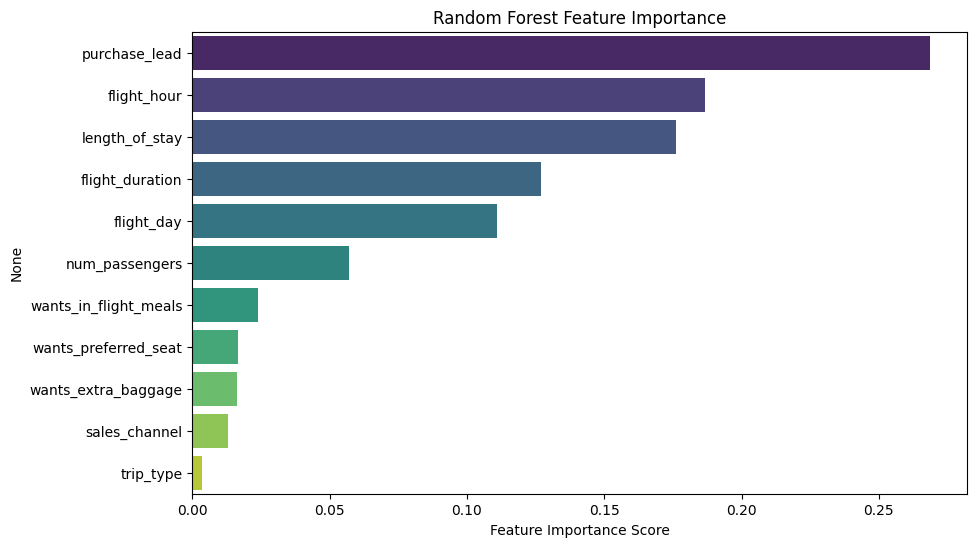

In [394]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

print(feature_importance)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance Score')
plt.show()

In [396]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

# Use a smaller subset of your data for the initial grid search
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Instantiate GridSearchCV with a smaller subset
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters
best_params = grid_search.best_params_

# Remove 'class_weight' from best_params if present
best_params.pop('class_weight', None)

# Use the best parameters to train the final model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_best = best_rf_model.predict(X_test)
print("Improved Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Improved Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       1.00      0.00      0.01      1480

    accuracy                           0.85     10000
   macro avg       0.93      0.50      0.46     10000
weighted avg       0.87      0.85      0.79     10000

Improved Confusion Matrix:
[[8520    0]
 [1475    5]]


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_8294/32688449.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


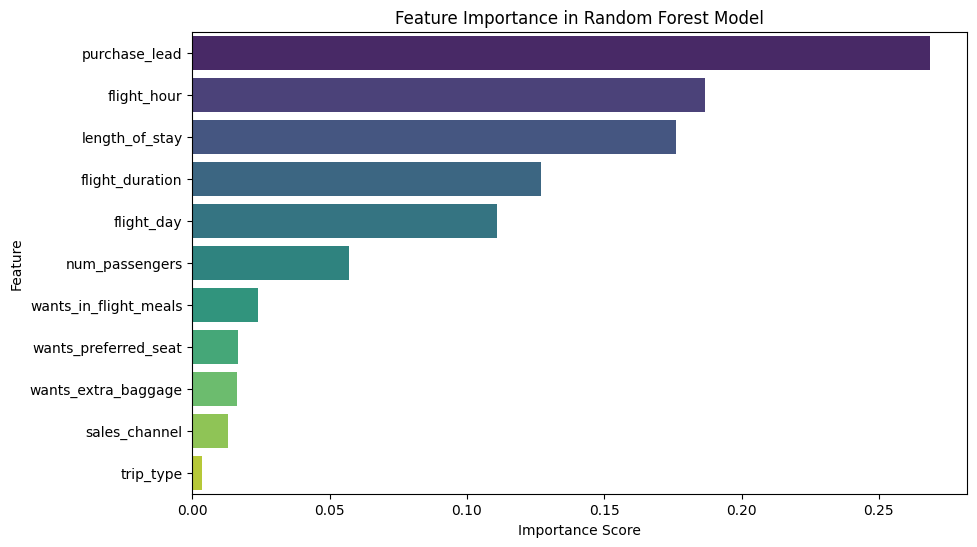

In [397]:

feature_importance = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [399]:
class_counts = df['booking_complete'].value_counts()
print(class_counts)


booking_complete
0    42522
1     7478
Name: count, dtype: int64


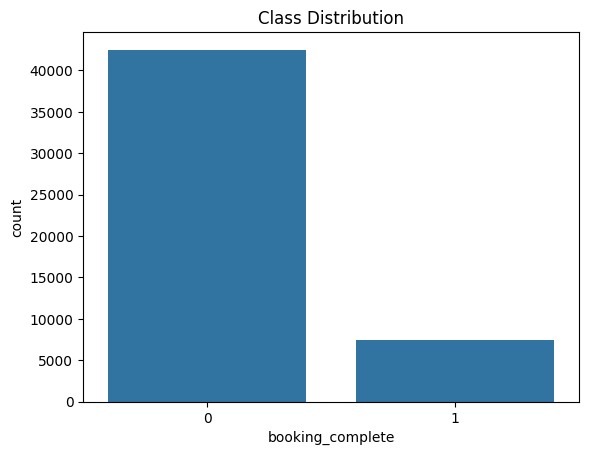

In [401]:
sns.countplot(x='booking_complete', data=df)
plt.title('Class Distribution')
plt.show()

In [417]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'booking_complete' is the target variable
X = df2_updated.drop('booking_complete', axis=1)  # Features
y = df2_updated['booking_complete']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create RandomForestClassifier with class_weight and train the model
rf_classifier = RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba > 0.6).astype(int)


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      8520
           1       0.29      0.11      0.16      1480

    accuracy                           0.83     10000
   macro avg       0.58      0.53      0.53     10000
weighted avg       0.78      0.83      0.79     10000

Confusion Matrix:
[[8132  388]
 [1318  162]]


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_8294/2809114509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


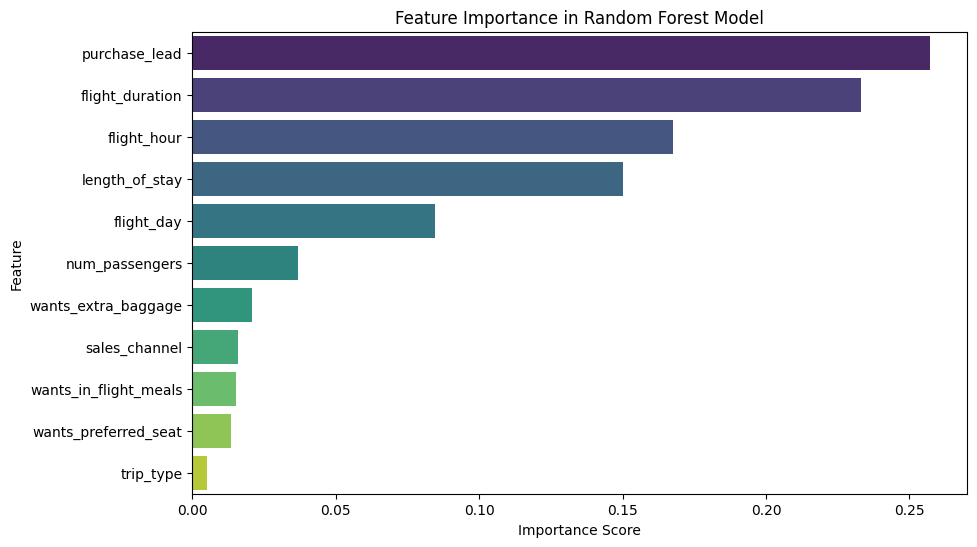

In [418]:
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()